In [20]:
from __future__ import absolute_import, division, print_function

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
import tensorflow_datasets as tfds
import math

In [23]:
import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm

In [24]:
# Import Fashion MNIST dataset

In [25]:
dataset, metadata=tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset=dataset['train'],dataset['test']

In [26]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
            'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [27]:
# Exploring the data 

In [28]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
print("Nbr of training examples: {}".format(num_train_examples))
print("Nbr of testing examples: {}".format(num_test_examples))

Nbr of training examples: 60000
Nbr of testing examples: 10000


In [29]:
# Preprocessing the data

# Because it is an image containing pixel of integers between 0&255,
# so we normalize them between 0 & 1

In [30]:
def normalize(images, labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images, labels

# Map function is used to apply the normalization function to each element
# in the train and test datasets
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

In [31]:
# Exploring the preprocessed data by plotting a sigle image
# Color dimension is removed by reshaping

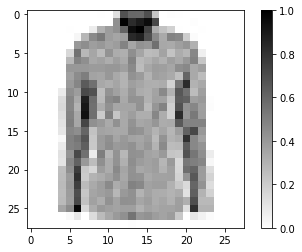

In [32]:
for image, label in test_dataset.take(1):
    break
image=image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.show();

In [33]:
# For verification let's plot the 25 first images

/Users/tamerhousseinhag/opt/anaconda3/envs/py3-TF2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


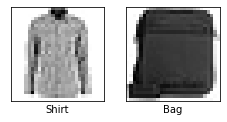

In [34]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i=+1
plt.show();

In [35]:
# Building the model

In [36]:
# Setting up the layer
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',
                           activation=tf.nn.relu,
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),                         # input data
    tf.keras.layers.Dense(128,activation=tf.nn.relu),  # Layer of 128 units (neurons or nodes)
    tf.keras.layers.Dense(10,activation=tf.nn.softmax) # Ouput data (10 nodes)
])

In [37]:
# Compiling the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
# Training the Model by:
 # Repeating forever. 
 # Shuffling the order so our model can't learn anything from the order of the examples.
 # Using batches of 32 images & labels when updating the model variables
    
# Testing the Model by:
 # Using batches of 32 images & labels when updating the model variables

In [39]:
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [40]:
# Training the model
model.fit(train_dataset,epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 416s 222ms/step - loss: 0.3958 - accuracy: 0.8587
Epoch 2/10
1875/1875 [==============================] - 382s 203ms/step - loss: 0.2583 - accuracy: 0.9050
Epoch 3/10
1875/1875 [==============================] - 360s 192ms/step - loss: 0.2136 - accuracy: 0.9215
Epoch 4/10
1875/1875 [==============================] - 425s 227ms/step - loss: 0.1862 - accuracy: 0.9322
Epoch 5/10
1875/1875 [==============================] - 443s 237ms/step - loss: 0.1539 - accuracy: 0.9443
Epoch 6/10
1875/1875 [==============================] - 450s 240ms/step - loss: 0.1344 - accuracy: 0.9506
Epoch 7/10
1875/1875 [==============================] - 456s 243ms/step - loss: 0.1120 - accuracy: 0.9576
Epoch 8/10
1875/1875 [==============================] - 377s 201ms/step - loss: 0.0947 - accuracy: 0.9650
Epoch 9/10
1875/1875 [==============================] - 373s 199ms/step - loss: 0.0803 - accuracy: 0.9708
Epoch 10/10
1875/1875 [==

In [41]:
# Evaluating accuracy

test_loss, test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset: ',test_accuracy)

313/313 [==============================] - 30s 95ms/step - loss: 0.3379 - accuracy: 0.9170
Accuracy on test dataset:  0.917


In [42]:
# Forecasting and exploration
for test_images,test_labels in test_dataset.take(1):
    test_images=test_images.numpy()
    test_labels=test_labels.numpy()
    predictions=model.predict(test_images)

In [43]:
predictions.shape

(32, 10)

In [44]:
# Prediction for the first image
predictions[0]

array([4.3117234e-09, 2.8820528e-11, 3.1871177e-06, 2.5001674e-07,
       6.4234855e-04, 3.8228234e-10, 9.9935406e-01, 4.1212359e-12,
       1.4653022e-11, 1.7352244e-07], dtype=float32)

In [45]:
np.argmax(predictions[0])

6

In [46]:
# Checking (test_labels) if the image nbr 6 is a shirt according to the Model

test_labels[0]

6

In [47]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

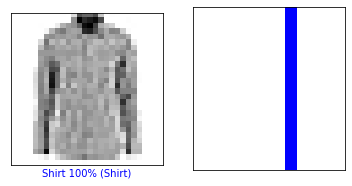

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

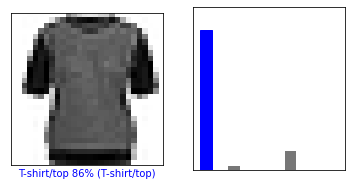

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

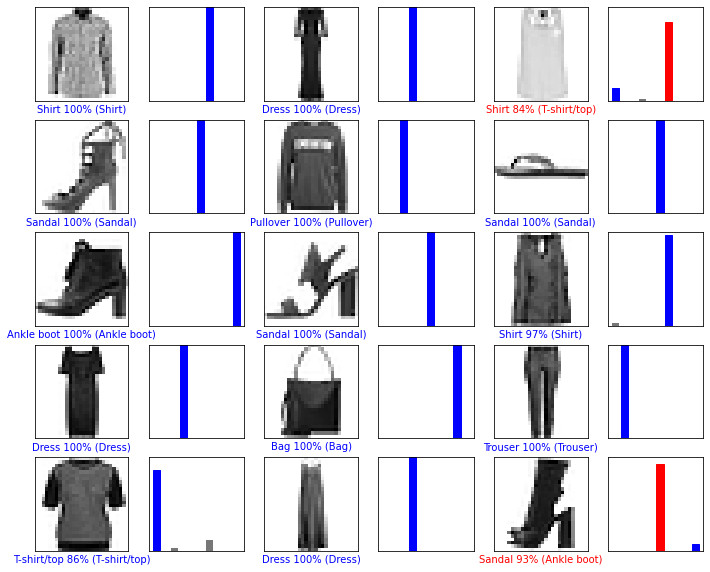

In [50]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

In [51]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [52]:
# tf.keras models are optimized to make predictions on a batch, or collection,
# of examples at once. So even though we're using a single image,
# we need to add it to a list:

# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [53]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.3117314e-09 2.8820691e-11 3.1871209e-06 2.5001819e-07 6.4234913e-04
  3.8228307e-10 9.9935406e-01 4.1212437e-12 1.4653135e-11 1.7352278e-07]]


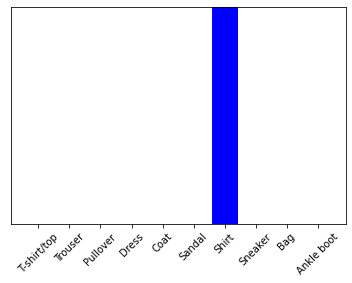

In [54]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [55]:
np.argmax(predictions_single[0])

6